# Visualizing with `pandas`
***

In [1]:
%matplotlib inline

# standard
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import seaborn as sns
sns.set()
sns.set_context('notebook', font_scale=1.5)
cp = sns.color_palette()

<br/>

### Thing 1: Line Chart (with many lines)
***

In [2]:
ts = pd.read_csv('data/ts.csv')

# casting to datetime is important for
# ensuring plots "just work"
ts = ts.assign(dt = pd.to_datetime(ts.dt))
ts.head()

,dt,kind,value
0,2000-01-01,A,1.442521
1,2000-01-02,A,1.981290
2,2000-01-03,A,1.586494
3,2000-01-04,A,1.378969
4,2000-01-05,A,-0.277937


In [3]:
# in matplotlib-land, the notion of a "tidy"
# dataframe matters not
dfp = ts.pivot(index='dt', columns='kind', values='value')
dfp.head()

kind,A,B,C,D
dt,,,,
2000-01-01,1.442521,1.808741,0.437415,0.096980
2000-01-02,1.981290,2.277020,0.706127,-1.523108
2000-01-03,1.586494,3.474392,1.358063,-3.100735
2000-01-04,1.378969,2.906132,0.262223,-2.660599
2000-01-05,-0.277937,3.489553,0.796743,-3.417402


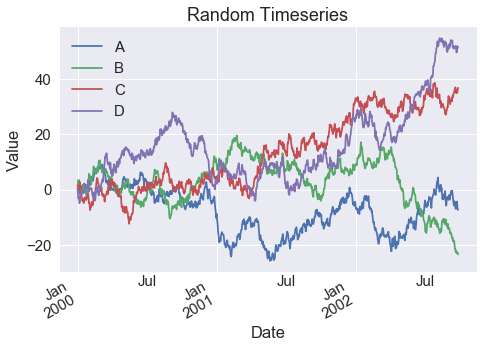

In [4]:
fig, ax = plt.subplots(1, 1,
                       figsize=(7.5, 5))

dfp.plot(ax=ax)

ax.set(xlabel='Date',
       ylabel='Value',
       title='Random Timeseries')
    
ax.legend(loc=2)
fig.autofmt_xdate()

<br/>

### Thing 2: Scatter
***

In [5]:
df = pd.read_csv('data/iris.csv')
df.head()

,petalLength,petalWidth,sepalLength,sepalWidth,species
0,1.4,0.2,5.1,3.5,setosa
1,1.4,0.2,4.9,3.0,setosa
2,1.3,0.2,4.7,3.2,setosa
3,1.5,0.2,4.6,3.1,setosa
4,1.4,0.2,5.0,3.6,setosa


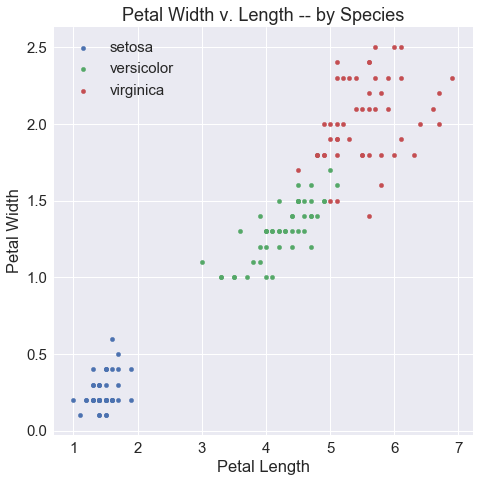

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(7.5, 7.5))

for i, s in enumerate(df.species.unique()):
    df[df.species == s].plot.scatter(
        'petalLength', 'petalWidth',
        c=cp[i], label=s, ax=ax
    )

ax.set(xlabel='Petal Length',
       ylabel='Petal Width',
       title='Petal Width v. Length -- by Species')

ax.legend(loc=2)

<br/>

### Thing 3: Trellising the Above
***

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a100b4898>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a17943f60>]], dtype=object)

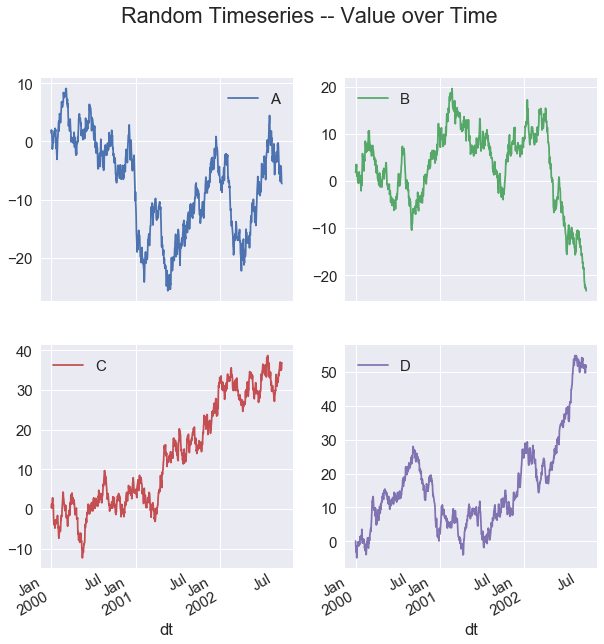

In [7]:
dfp.plot(subplots=True, layout=(2, 2), figsize=(10, 10),
         title='Random Timeseries -- Value over Time')

In [8]:
tmp_n = df.shape[0] - df.shape[0]/2

df['random_factor'] = np.random.permutation(['A'] * tmp_n + ['B'] * (df.shape[0] - tmp_n))
df.head()

TypeError: can't multiply sequence by non-int of type 'float'

<br/>

### Thing 4: Visualizing Distributions (Boxplot and Histogram)
***

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

df.boxplot(column='petalWidth', by='species', ax=ax)

sns.set_context('notebook', font_scale=1.25)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

df.boxplot(column='petalWidth', by=['species', 'random_factor'], ax=ax)

sns.set_context('notebook', font_scale=1.5)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

df.hist(column='petalWidth', by='species', grid=None, ax=ax)

<br/>

### Thing 5: Bar Chart
***

In [ ]:
df = pd.read_csv('data/titanic.csv')
df.head()

In [ ]:
dfg = df.groupby(['survived', 'pclass']).agg({'fare': 'mean'})
dfg

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12.5, 7))

dfg.reset_index().\
    pivot(index='pclass',
          columns='survived',
          values='fare').plot.bar(ax=ax)

ax.set(xlabel='Class',
       ylabel='Fare',
       title='Fare by survival and class')